In [ ]:
"""
#Program developed by Raul Ramirez Summer 2019
#Monterrey NL rramirez@tec.mx
#based in multiple sources
"""

In [78]:
import pandas as pd 
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
import seaborn as sn
import numpy as np

In [79]:
candidates = pd.read_csv('candidates.csv')
candidates.head(10)

,gmat,gpa,work_experience,admitted
0,708,4.0,3,1
1,750,3.9,4,1
2,690,3.3,3,1
3,710,3.7,5,1
4,680,3.9,4,1
5,730,3.7,6,1
6,690,2.3,1,0
7,720,3.3,4,1
8,740,3.3,5,1
9,690,1.7,1,0


In [80]:
#Separate dependent and independent variables
X = candidates[['gmat', 'gpa','work_experience']]
y = candidates['admitted']

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.80,random_state=0)

#Standarize data. Subtract mean and devide by standard deviation
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [82]:
svmClassSVC= SVC(gamma='scale')
svmClassSVC.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [83]:
y_pred=svmClassSVC.predict(X_test)
print(y_pred)

[0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0]


In [84]:
from sklearn.metrics import confusion_matrix

In [85]:
cm = confusion_matrix(y_test,y_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()

[[13  0]
 [ 0 19]]


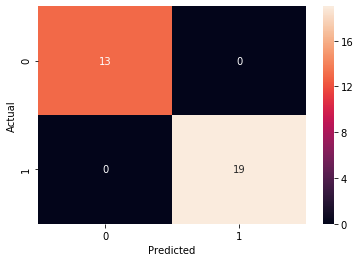

In [86]:
cm2 = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sn.heatmap(cm2,annot=True)

In [87]:
tn, fp, fn, tp

(13, 0, 0, 19)

In [88]:
from sklearn.metrics import classification_report

In [89]:
target_names = ['class 0', 'class 1']
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        19

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



In [90]:
recall=tp/(tp+fn)
print("Likelihood Ratio",recall/(1-recall))

Likelihood Ratio inf


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


In [91]:
print("Accuracy=",(tp+tn)/(tp+tn+fp+fn))

Accuracy= 1.0
